# **Topic Classification of News Articles**

## 1. Introduction

### **Welcome**

*I would like to pay my gratitutde for coming to my colab notebook. I hope you will really enjoy using it as this colab notebook is designed for fully user-friendly purpose.
My name is **Ahmad Khalid** and I am working as Machine Learning Engineer for more than a year. Currently I am also engaged with many projects related to Data Science, Machine Learning, Deep Learning and Computer Vision.*

### **About this Project**

*The purpose of this project is to identify the topic of the news articles. We give URL of the article and get the topic name as an output. The model we use to classify the topics is called **Latent Dirichlet Allocation** that was proposed in 2000 and developed in 2003. It is a Generative Statistical Model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. It is widely used in the topic modeling specifically for the text. Further information can be explored from this website **https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation** .*

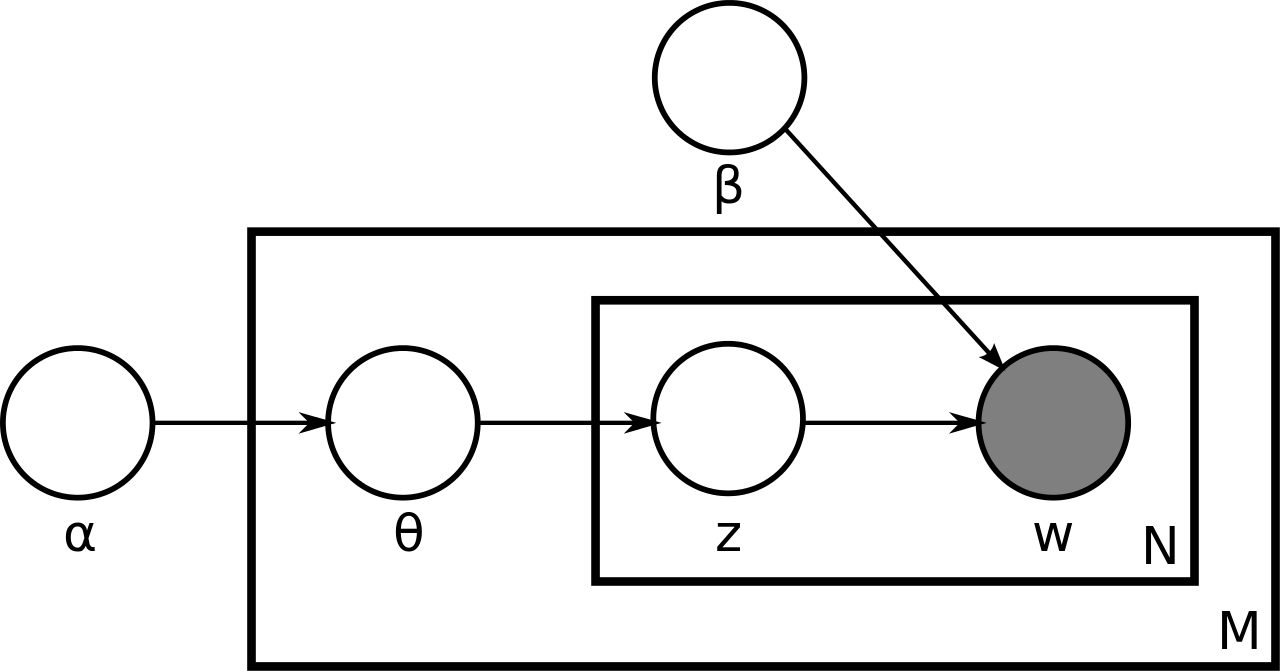

## 2. Synchronization of Google Drive

### **Boost Up your Environment**

*It is a right time to change the runtime if you would like to get amazing processing speed. Just click on **Runtime** on the top left of your Google Colab Notebook, click on **Change Runtime Type** and then select **TPU**. The next level GPU provided by the Google*.


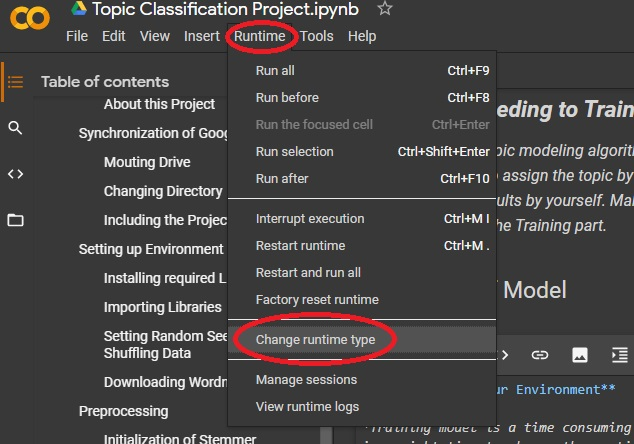



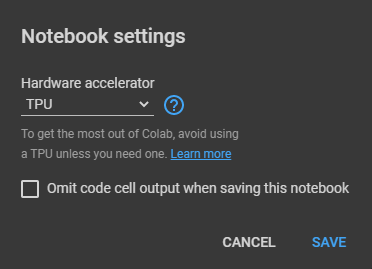

### **Mouting Drive**

*click the given link after running the cell
   Select the google account for drive and Give permissions
   and copy and paste the given authorization code into box below and press Enter*

In [3]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


### **Changing Directory**

In [4]:
%cd /content/drive/My\ Drive
print("Successfully changed the directory to My Drive")

/content/drive/My Drive
Successfully changed the directory to My Drive


### **Including the Project Files**

*Now it is time to include the files related to this project. Grab the files form the given link below:*

**http://bit.ly/lda_project_files**

*Once you have done with this, Please right click on the **Project Files** and select **Add Shortcut to Drive**. Then select ** My Drive**. This step will instantly add the **Project Files** path in your main directory. That we will further explore in our project.*
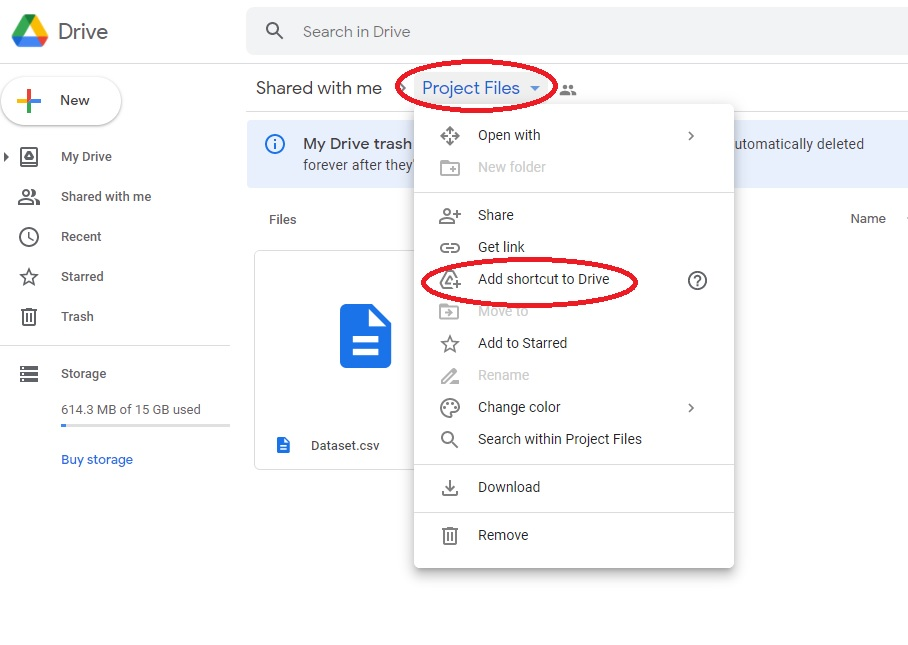




*Now you must me able to see the files in your **My Drive** folder*

## 3. Setting up Environment

### **Installing required Libraries**

*There is one library that is not included in the Google Colab. So we are installing it manually. This is related to newspaper extraction and will help us to execute the URL text at runtime.*

In [5]:
#Installing the newspaper library for Python 3
!pip install newspaper3k
print("Newspaper library has been installed!")

     |████████████████████████████████| 215kB 3.2MB/s 
     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 92kB 4.2MB/s 
     |████████████████████████████████| 7.4MB 5.1MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-cp36-none-any.whl size=13538 sha256=37c3243d1cf39abeba7ab3537a518554b6eb5d0a0218a8f47cb770b25d9cec66
  Stored in directory: /root/.cache/pip/wheels/81/2b/43/a02ede72324dd40cdd7ca53aad718c7710628e91b8b0dc0f02
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-cp36-none-any.whl size=3355 sha256=77fe6ce71216972be75aa4496650b5889d164ae59be2a7b36a96b41bc14b87b5
  Stored in directory: /root/.cache/pip/wheels/de/03/ca/778e3a7a627e3d98836cc890e7cb40c7575424cfd3340f40ed
  Created wheel for jieba3k: filename=jieba3k-0.35.1-cp36-none-any.whl size=7398406 sha256=8a916a7a200c4e05e509a238e0b3c605b311c21ad6fa936cb64df67f3e753f9e
  Stored in directory: /root/.cache/pip/wheels/83/15/9c/a3f1f67e7f7181170ad37d32e503c35da

### **Importing Libraries**

In [6]:
from sklearn.datasets import fetch_20newsgroups
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pickle
import nltk
import csv
from newspaper import Article

print("All Libraries have been imported")

All Libraries have been imported


### **Setting Random Seed for Shuffling Data**

In [7]:
np.random.seed(400) 

### **Downloading Wordnet**
*This is added to remove the Stop Words*

In [8]:
print("Downloading wordnet")
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## 4. Preprocessing

### **Initialization of Stemmer**
*This is added to simplify the words and reduce to their root form*

In [9]:
stemmer = SnowballStemmer("english")

### **Including the Functions for Text Preprocessing**
*This includes lemmatization and stemming of the words. Lemmatization is a process in which words are converted to the first form of verb and stemming is the process to reduce them into their root form.*

In [10]:

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result


## ***Before Proceeding to Training. Please note this!***
*LDA is more like topic modeling algorithm rather than classification. It is an unsupervised technique in which we do not the topic names directly. We have to assign the topic by ourselves. Therefore, If you would like to train the model, then you have to analyze the topic names from the model results by yourself. Make sure to save the model file with different name. If you would like to direct go to the Runtime results, then you can skip the Training part.*

*However you can take insights from here for the runtime part. Because same processes will be used for runtime data while processing other than training the model.*

## 5. Training of Model

### **Fetch Training and Test Data from Newspapers**

In [11]:
#Fetching Training Data
newsgroups_train = fetch_20newsgroups(subset='train', shuffle = True)
print("Trainig data has been imported")

print("\n\nThe target names of training data are given below:\n\n")
print(list(newsgroups_train.target_names))


#Fetching Test Data
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True)
print("Trainig data has been imported")

print("\n\nThe target names of test data are given below:\n\n")
print(list(newsgroups_train.target_names))


Trainig data has been imported


The target names of training data are given below:


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
Trainig data has been imported


The target names of test data are given below:


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


### **Preprocess the News Articles**

In [21]:
processed_docs = []
count = 0
length  = len(newsgroups_train.data)

for doc in newsgroups_train.data:
    processed_docs.append(preprocess(doc))
    percentage = int(round(count/length,2)*100)
    print(percentage, '% preprocessing is completed' )
    count += 1

Streaming output truncated to the last 5000 lines.
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is completed
56 % preprocessing is

### **Make the Dictionary of Words**

In [22]:
dictionary = gensim.corpora.Dictionary(processed_docs) #For creating dictionary
print("Dictionary has been made")
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000) #For removing most rare and most common words


Dictionary has been made


### **Create Bag of Words**

*This is a necessary step to create the bag of words for each article.*

In [23]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print("Bag of Words have been created")

Bag of Words have been created


### **Training of LDA Model**

In [25]:
#Information regarding parameters
#bow_corpus -> bag of words we have stored after preprocessing
#num_topics -> Number of topics on which we would like to model our LDA algorithm
#id2word -> Mapping from word IDs (integer) to the words (String)
#passes -> Number of training passes through the corpus
#workers -> Multi core parallel processing. 

print("LDA model has started training!")
lda_model =  gensim.models.LdaMulticore(bow_corpus, num_topics = 8, id2word = dictionary, passes = 10, workers = 2)
print("LDA Model is trained now")

#Visualize the model results
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")


LDA model has started training!
LDA Model is trained now
Topic: 0 
Words: 0.019*"game" + 0.016*"team" + 0.012*"play" + 0.010*"player" + 0.007*"hockey" + 0.007*"season" + 0.005*"leagu" + 0.005*"score" + 0.005*"basebal" + 0.004*"divis"


Topic: 1 
Words: 0.005*"bike" + 0.004*"wire" + 0.003*"power" + 0.003*"sale" + 0.003*"drive" + 0.003*"caus" + 0.003*"food" + 0.003*"insur" + 0.003*"pitt" + 0.003*"high"


Topic: 2 
Words: 0.013*"christian" + 0.010*"jesus" + 0.007*"bibl" + 0.006*"church" + 0.005*"life" + 0.005*"live" + 0.005*"book" + 0.005*"christ" + 0.004*"word" + 0.004*"faith"


Topic: 3 
Words: 0.011*"moral" + 0.009*"exist" + 0.009*"uiuc" + 0.008*"cwru" + 0.008*"atheist" + 0.007*"object" + 0.007*"keith" + 0.006*"cleveland" + 0.006*"caltech" + 0.005*"freenet"


Topic: 4 
Words: 0.007*"israel" + 0.006*"isra" + 0.005*"govern" + 0.005*"presid" + 0.005*"jew" + 0.004*"american" + 0.004*"human" + 0.004*"arab" + 0.004*"countri" + 0.003*"evid"


Topic: 5 
Words: 0.010*"encrypt" + 0.009*"govern" 

### **Test the Model Results**

In [26]:
num = 100
unseen_document = newsgroups_test.data[num]
print(unseen_document)

# Data preprocessing step for the unseen document
bow_vector = dictionary.doc2bow(preprocess(unseen_document))

#Visualizing the results
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

index = newsgroups_test.target[num]
print("This topic belongs to the ", newsgroups_test.target_names[index])


Subject: help
From: C..Doelle@p26.f3333.n106.z1.fidonet.org (C. Doelle)
Lines: 13

Hello All!

    It is my understanding that all True-Type fonts in Windows are loaded in
prior to starting Windows - this makes getting into Windows quite slow if you
have hundreds of them as I do.  First off, am I correct in this thinking -
secondly, if that is the case - can you get Windows to ignore them on boot and
maybe make something like a PIF file to load them only when you enter the
applications that need fonts?  Any ideas?


Chris

 * Origin: chris.doelle.@f3333.n106.z1.fidonet.org (1:106/3333.26)

Score: 0.9717345237731934	 Topic: 0.014*"window" + 0.013*"file" + 0.008*"drive" + 0.008*"program" + 0.007*"card"
This topic belongs to the  comp.os.ms-windows.misc


### **Save the Model**
*By Default, it will save the model in **Project Files** directory. You can change the path and model name by yourself. Be careful. The model used in the runtime has name **LDA_model**. Therefore, if you save with the same name then you will definately lose the model data and then you have to analyze the new model again and assign the topics. We would like to classify our model in these topics given below:*

*0: Graphics Cards*

*1: Religion*

*2: Space*

*3: Politics*

*4: Hardware*

*5: Technology*

*6: Sports*

*7: Encryption*




In [17]:

with open('/content/drive/My Drive/Project Files/LDA_new_model','wb') as f:
    pickle.dump(lda_model,f)
print("Model file has been saved now")

Model file has been saved now


## 6. Runtime Program


*Run this block to use these functions in the runtime demonstration*

In [56]:
def diff(a, b):
  return abs(a-b)

def final_results(res, topics):
  cond1 =(diff(res[0][1], res[1][1]) <= 0.35 and diff(res[0][1], res[1][1]) >= 0.01) 
  cond2 =(diff(res[0][1], res[2][1]) <= 0.35 and diff(res[0][1], res[2][1]) >= 0.01)
  if (diff(res[0][1], res[1][1]) >= 0.35 and diff(res[0][1], res[2][1] >= 0.35)):
    score = int(round(res[0][1],2)*100)
    return "Our model is "+str(score)+"% confident that this article belongs to "+topics[res[0][0]]
  
  elif (res[0][1] <= 0.15):
    return "The model has very low confidence that "+topic[res[0][0]] +"is the topic maybe we can relate with it"

  elif (cond1 or cond2):
    score1 = int(round(res[0][1],2)*100)
    score2= int(round(res[1][1],2)*100)
    score3 = int(round(res[2][1],2)*100)
    return "The model think that this article may lies in the topics given below: \n"+topics[res[0][0]]+' with confidence score of '+str(score1)+"% \n"+topics[res[1][0]]+' with confidence score of '+str(score2)+"% \n"+topics[res[2][0]]+' with confidence score of '+str(score3)+"% \n"
    


*Finally, we are now able to run our model in runtime and fetch some amazing results. In runtime, we will use URLs of different topic and will get our topic name with some confidence score.*

In [60]:
processed_docs = []
with open('/content/drive/My Drive/Project Files/Dataset.csv', 'r', newline="", encoding = 'cp1252') as csvfile:
    read_data = csv.reader(csvfile)
    print(read_data)
    for data in read_data:
        processed_docs.append(data)

        
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)


with open('/content/drive/My Drive/Project Files/LDA_model','rb') as f:  
   lda_model=pickle.load(f)
   
   
topics=['Politics', 'Hardware', 'Graphic Cards', 
 'Space', 'Encryption', 'Sports', 'Technology', 'Religion']
   

print("\n\n\nOur model classify articles into following topics\n\n\n")
for i in range(len(topics)):
    print(str(i)+': '+topics[i])
    
    
print("\n\n\n-----------------------------------")
print("Done! Everthing is loaded now....!")
print("-----------------------------------\n\n\n")


print("The predictor will start working now. \n Just press 'yes' until you won't get bored :) \n from topic prediction. Good luck!")

decision = 'yes'

while (decision[0] == 'y'):
    
    url = input("Please enter valid News Article URL...\n")
    article = Article(url)
    print("\n\n\nArticle is being downloaded...\n\n\n")
    article.download()
    article.parse() 
    unseen_document = article.text
    print("\n\n\n Download complete!\n\n\n")
    bow_vector = dictionary.doc2bow(preprocess(unseen_document))
    results = lda_model[bow_vector]
    sort_results = sorted(results, key=lambda score: score[1], reverse = True)

    

    print('\n\n-----------------\n\n')
    print(final_results(sort_results, topics))
    
    decision = input("\n\n\n Would you like to see the detailed results?...")
    decision = decision.lower()    
    
    if (decision[0] == 'y'):
        for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
            print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))
    
    decision = input("Would you like to input again? :")
    decision= decision.lower()
    

print("\n\n\n Thank you! Hope you liked our services! :)")
    
    





Our model classify articles into following topics



0: Politics
1: Hardware
2: Graphic Cards
3: Space
4: Encryption
5: Sports
6: Technology
7: Religion



-----------------------------------
Done! Everthing is loaded now....!
-----------------------------------



The predictor will start working now. 
 Just press 'yes' until you won't get bored :) 
 from topic prediction. Good luck!
Please enter valid News Article URL...
https://www.space.com/



Article is being downloaded...






 Download complete!





-----------------


The model think that this article may lies in the topics given below: 
Hardware with confidence score of 37% 
Space with confidence score of 31% 
Graphic Cards with confidence score of 27% 




 Would you like to see the detailed results?...n
Would you like to input again? :y
Please enter valid News Article URL...
https://www.space.com/nasa-spooky-halloween-space-posters-2020



Article is being downloaded...






 Download complete!





-----------------


## 7. Credits

*I would like to give credit **Priya Dwidei** whose Github repository helped me to create this Google Colab notebook. I would like to you to star her Github repository. I am giving the link blow:*

**https://github.com/priya-dwivedi/Deep-Learning/**